HARSHAVARTHAN SB 24BAD033
Accuracy: 0.968609865470852
Precision: 1.0
Recall: 0.7666666666666667
F1 Score: 0.8679245283018868


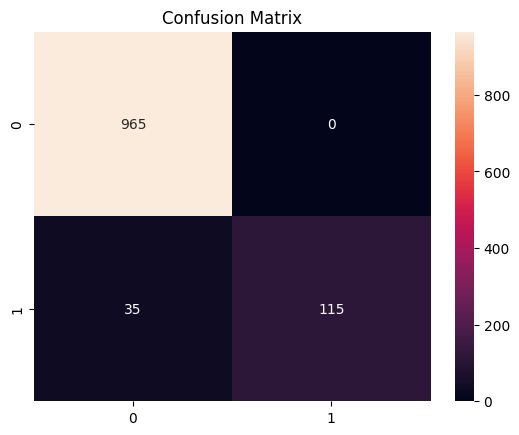

In [2]:
print("HARSHAVARTHAN SB 24BAD033")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

df=pd.read_csv("/kaggle/input/datasets/organizations/uciml/sms-spam-collection-dataset/spam.csv",encoding="latin-1")
df=df[["v1","v2"]]
df.columns=["label","text"]

df["text"]=df["text"].str.lower()
df["text"]=df["text"].apply(lambda x:re.sub(r"[^a-z ]","",x))

le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])

X_train,X_test,y_train,y_test=train_test_split(df["text"],df["label"],test_size=0.2,random_state=42)

tfidf=TfidfVectorizer(stop_words="english")
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

model=MultinomialNB(alpha=1.0)
model.fit(X_train,y_train)

pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred))
print("Recall:",recall_score(y_test,pred))
print("F1 Score:",f1_score(y_test,pred))

cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.show()

HARSHAVARTHAN SB 24BAD033
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



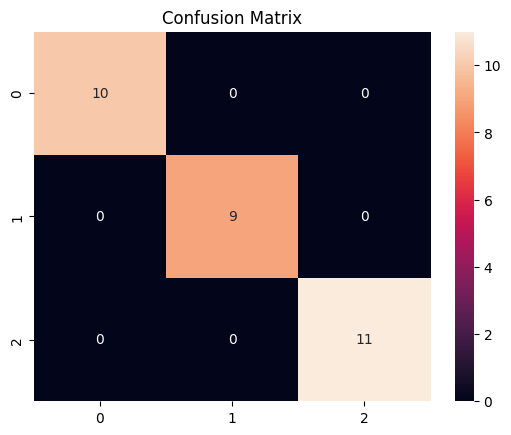

In [3]:
print("HARSHAVARTHAN SB 24BAD033")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

iris=load_iris()
X=iris.data
y=iris.target

sc=StandardScaler()
X=sc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=GaussianNB()
model.fit(X_train,y_train)

pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.show()

HARSHAVARTHAN SB 24BAD033
Best K: 11
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



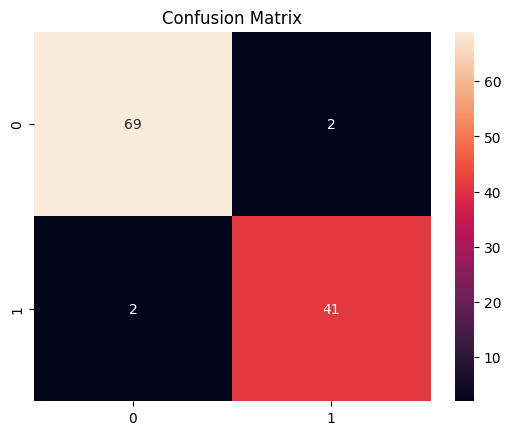

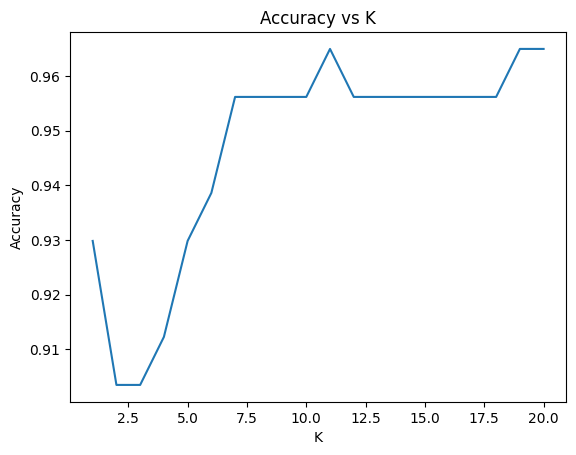

In [4]:
print("HARSHAVARTHAN SB 24BAD033")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df=pd.read_csv("/kaggle/input/datasets/yasserh/breast-cancer-dataset/breast-cancer.csv")

df["diagnosis"]=df["diagnosis"].map({"M":1,"B":0})

X=df[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean"]]
y=df["diagnosis"]

sc=StandardScaler()
X=sc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

acc_list=[]
k_values=range(1,21)

for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc_list.append(accuracy_score(y_test,pred))

best_k=k_values[np.argmax(acc_list)]
print("Best K:",best_k)

model=KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.show()

plt.plot(k_values,acc_list)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

HARSHAVARTHAN SB 24BAD033
Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



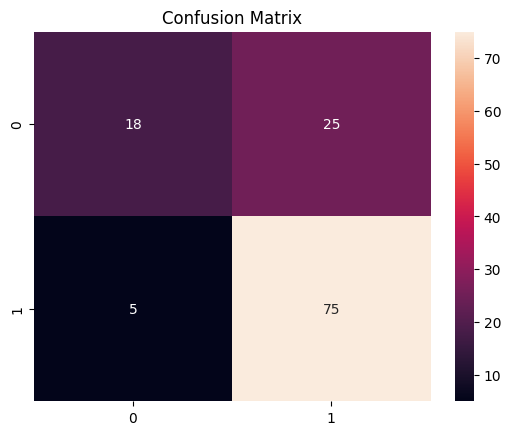

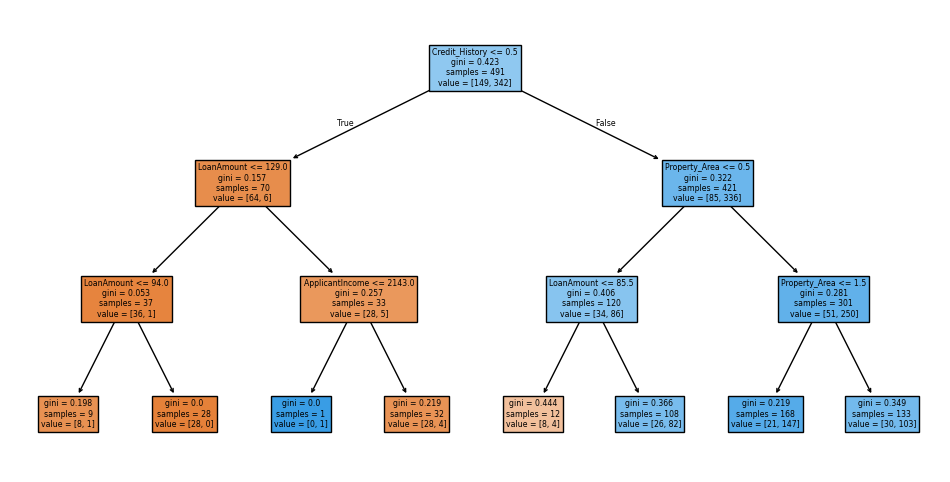

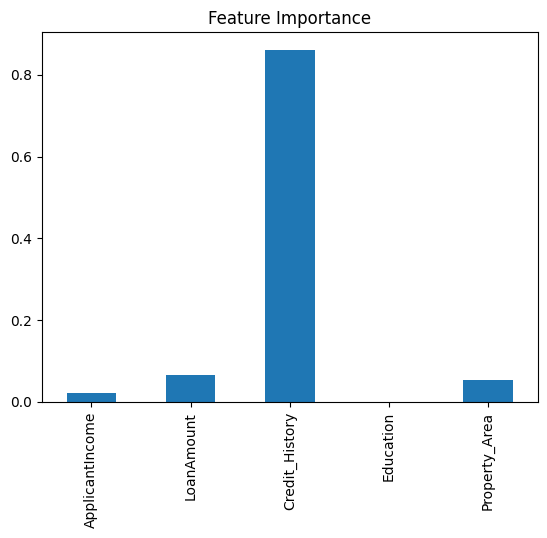

In [5]:
print("HARSHAVARTHAN SB 24BAD033")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df=pd.read_csv("/kaggle/input/datasets/ninzaami/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")

df.fillna(df.mode().iloc[0],inplace=True)

le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

X=df[["ApplicantIncome","LoanAmount","Credit_History","Education","Property_Area"]]
y=df["Loan_Status"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12,6))
plot_tree(model,feature_names=X.columns,filled=True)
plt.show()

feat=pd.Series(model.feature_importances_,index=X.columns)
feat.plot(kind="bar")
plt.title("Feature Importance")
plt.show()